In [1]:
%load_ext autoreload

In [5]:
%autoreload 2

from hydra import compose, initialize
import matplotlib.pyplot as plt
import os
from tqdm.auto import tqdm
import h5py
import numpy as np
from UniversalUnconsciousness.data_utils import *
from UniversalUnconsciousness.plot_utils import *
from UniversalUnconsciousness.power_analysis import *

plt.style.use('UniversalUnconsciousness.sci_style')
load_font()

In [3]:
with initialize(version_base="1.3", config_path="../UniversalUnconsciousness/DeLASE_analysis/conf"):
    cfg = compose(config_name="config")

In [4]:
cfg.params.low_pass = None
cfg.params.high_pass = None

In [11]:
anesthetic_agent_list = cfg.plotting.anesthetic_agent_list
img_save_dir = cfg.plotting.img_save_dir
curve_colors = cfg.plotting.curve_colors
loc_roc_colors = cfg.plotting.loc_roc_colors
os.makedirs(img_save_dir, exist_ok=True)

In [8]:
agent_data = get_agent_data(cfg, use_individiual_areas=False, verbose=True)

  0%|          | 0/3 [00:00<?, ?it/s]

File found for session MrJones-Anesthesia-20160125-01: /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/noise_filter_info/propofolPuffTone/MrJones-Anesthesia-20160125-01__window_15__wakethresh_1__anesthesiathresh_1__electrodenum_1__stride_15.pkl
23 bad electrodes, 535 valid windows (out of 672 total windows)
File found for session MrJones-Anesthesia-20160210-01: /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/noise_filter_info/propofolPuffTone/MrJones-Anesthesia-20160210-01__window_15__wakethresh_1__anesthesiathresh_1__electrodenum_1__stride_15.pkl
18 bad electrodes, 395 valid windows (out of 650 total windows)
File found for session Mary-Anesthesia-20160818-02: /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/noise_filter_info/propofolPuffTone/Mary-Anesthesia-20160818-02__window_15__wakethresh_1__anesthesiathresh_1__electrodenum_1__stride_15.pkl
7 bad electrodes, 219 valid windows (out of 377 total windows)
File found for session MrJones-Anesthesia-20160121

Getting Grid Search Run List:   0%|          | 0/21 [00:00<?, ?it/s]

list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/MrJones-Anesthesia-20160125-01_grid_set6_window_15...
*COMPLETE*: All results completed for MrJones-Anesthesia-20160125-01 - all!!
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/MrJones-Anesthesia-20160210-01_grid_set6_window_15...
*COMPLETE*: All results completed for MrJones-Anesthesia-20160210-01 - all!!
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/Mary-Anesthesia-20160818-02_grid_set6_window_15...
*COMPLETE*: All results completed for Mary-Anesthesia-20160818-02 - all!!
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/MrJones-Anesthesia-20160121-01_grid_set6_window_15...
*COMPLETE*: All results complet

  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160210-01
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/MrJones-Anesthesia-20160210-01_grid_set6_window_15...
Loading data for MrJones-Anesthesia-20160210-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/MrJones-Anesthesia-20160210-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160818-02
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/Mary-Anesthesia-20160818-02_grid_set6_window_15...
Loading data for Mary-Anesthesia-20160818-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/Mary-Anesthesia-20160818-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160121-01
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/MrJones-Anesthesia-20160121-01_grid_set6_window_15...
Loading data for MrJones-Anesthesia-20160121-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/MrJones-Anesthesia-20160121-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160822-02
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/Mary-Anesthesia-20160822-02_grid_set6_window_15...
Loading data for Mary-Anesthesia-20160822-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/Mary-Anesthesia-20160822-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160809-01
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/Mary-Anesthesia-20160809-01_grid_set6_window_15...
Loading data for Mary-Anesthesia-20160809-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/Mary-Anesthesia-20160809-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160301-01
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/MrJones-Anesthesia-20160301-01_grid_set6_window_15...
Loading data for MrJones-Anesthesia-20160301-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/MrJones-Anesthesia-20160301-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160908-02
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/Mary-Anesthesia-20160908-02_grid_set6_window_15...
Loading data for Mary-Anesthesia-20160908-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/Mary-Anesthesia-20160908-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160902-02
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/Mary-Anesthesia-20160902-02_grid_set6_window_15...
Loading data for Mary-Anesthesia-20160902-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/Mary-Anesthesia-20160902-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160912-02
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/Mary-Anesthesia-20160912-02_grid_set6_window_15...
Loading data for Mary-Anesthesia-20160912-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/Mary-Anesthesia-20160912-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160105-01
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/MrJones-Anesthesia-20160105-01_grid_set6_window_15...
Loading data for MrJones-Anesthesia-20160105-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/MrJones-Anesthesia-20160105-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160201-01
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/MrJones-Anesthesia-20160201-01_grid_set6_window_15...
Loading data for MrJones-Anesthesia-20160201-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/MrJones-Anesthesia-20160201-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160113-01
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/MrJones-Anesthesia-20160113-01_grid_set6_window_15...
Loading data for MrJones-Anesthesia-20160113-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/MrJones-Anesthesia-20160113-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160916-02
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/Mary-Anesthesia-20160916-02_grid_set6_window_15...
Loading data for Mary-Anesthesia-20160916-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/Mary-Anesthesia-20160916-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160826-02
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/Mary-Anesthesia-20160826-02_grid_set6_window_15...
Loading data for Mary-Anesthesia-20160826-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/Mary-Anesthesia-20160826-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160206-01
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/MrJones-Anesthesia-20160206-01_grid_set6_window_15...
Loading data for MrJones-Anesthesia-20160206-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/MrJones-Anesthesia-20160206-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160107-01
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/MrJones-Anesthesia-20160107-01_grid_set6_window_15...
Loading data for MrJones-Anesthesia-20160107-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/MrJones-Anesthesia-20160107-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160914-02
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/Mary-Anesthesia-20160914-02_grid_set6_window_15...
Loading data for Mary-Anesthesia-20160914-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/Mary-Anesthesia-20160914-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160123-01
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/MrJones-Anesthesia-20160123-01_grid_set6_window_15...
Loading data for MrJones-Anesthesia-20160123-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/MrJones-Anesthesia-20160123-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160831-02
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/Mary-Anesthesia-20160831-02_grid_set6_window_15...
Loading data for Mary-Anesthesia-20160831-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/Mary-Anesthesia-20160831-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160109-01
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_run_lists/MrJones-Anesthesia-20160109-01_grid_set6_window_15...
Loading data for MrJones-Anesthesia-20160109-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/propofolPuffTone/grid_search_results/MrJones-Anesthesia-20160109-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/300 [00:00<?, ?it/s]

Results for session: MrJones-Anesthesia-20160125-01, area: all: n_delays=5, rank=1000
Results for session: MrJones-Anesthesia-20160210-01, area: all: n_delays=5, rank=1050
Results for session: Mary-Anesthesia-20160818-02, area: all: n_delays=5, rank=1100
Results for session: MrJones-Anesthesia-20160121-01, area: all: n_delays=5, rank=1050
Results for session: Mary-Anesthesia-20160822-02, area: all: n_delays=5, rank=1150
Results for session: Mary-Anesthesia-20160809-01, area: all: n_delays=5, rank=1150
Results for session: MrJones-Anesthesia-20160301-01, area: all: n_delays=5, rank=1000
Results for session: Mary-Anesthesia-20160908-02, area: all: n_delays=5, rank=1100
Results for session: Mary-Anesthesia-20160902-02, area: all: n_delays=5, rank=1100
Results for session: Mary-Anesthesia-20160912-02, area: all: n_delays=5, rank=1100
Results for session: MrJones-Anesthesia-20160105-01, area: all: n_delays=5, rank=1000
Results for session: MrJones-Anesthesia-20160201-01, area: all: n_delays

Getting DeLASE Run List:   0%|          | 0/21 [00:00<?, ?it/s]

/scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_run_lists/MrJones-Anesthesia-20160125-01__stride_15__window_15__SECTIONS_TO_USE_all_sections
*COMPLETE*: All results completed for MrJones-Anesthesia-20160125-01 - all!!
/scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_run_lists/MrJones-Anesthesia-20160210-01__stride_15__window_15__SECTIONS_TO_USE_all_sections
*COMPLETE*: All results completed for MrJones-Anesthesia-20160210-01 - all!!
/scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_run_lists/Mary-Anesthesia-20160818-02__stride_15__window_15__SECTIONS_TO_USE_all_sections
*COMPLETE*: All results completed for Mary-Anesthesia-20160818-02 - all!!
/scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_run_lists/MrJones-Anesthesia-20160121-01__stride_15__window_15__SECTIONS_TO_USE_all_sections
*COMPLETE*: All

  0%|          | 0/671 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160210-01
--------------------
Loading data for MrJones-Anesthesia-20160210-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/MrJones-Anesthesia-20160210-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1050/STRIDE_15/all/NO_PCA


  0%|          | 0/649 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160818-02
--------------------
Loading data for Mary-Anesthesia-20160818-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/Mary-Anesthesia-20160818-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1100/STRIDE_15/all/NO_PCA


  0%|          | 0/376 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160121-01
--------------------
Loading data for MrJones-Anesthesia-20160121-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/MrJones-Anesthesia-20160121-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1050/STRIDE_15/all/NO_PCA


  0%|          | 0/673 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160822-02
--------------------
Loading data for Mary-Anesthesia-20160822-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/Mary-Anesthesia-20160822-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1150/STRIDE_15/all/NO_PCA


  0%|          | 0/402 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160809-01
--------------------
Loading data for Mary-Anesthesia-20160809-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/Mary-Anesthesia-20160809-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1150/STRIDE_15/all/NO_PCA


  0%|          | 0/471 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160301-01
--------------------
Loading data for MrJones-Anesthesia-20160301-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/MrJones-Anesthesia-20160301-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1000/STRIDE_15/all/NO_PCA


  0%|          | 0/659 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160908-02
--------------------
Loading data for Mary-Anesthesia-20160908-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/Mary-Anesthesia-20160908-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1100/STRIDE_15/all/NO_PCA


  0%|          | 0/441 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160902-02
--------------------
Loading data for Mary-Anesthesia-20160902-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/Mary-Anesthesia-20160902-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1100/STRIDE_15/all/NO_PCA


  0%|          | 0/459 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160912-02
--------------------
Loading data for Mary-Anesthesia-20160912-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/Mary-Anesthesia-20160912-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1100/STRIDE_15/all/NO_PCA


  0%|          | 0/432 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160105-01
--------------------
Loading data for MrJones-Anesthesia-20160105-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/MrJones-Anesthesia-20160105-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1000/STRIDE_15/all/NO_PCA


  0%|          | 0/830 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160201-01
--------------------
Loading data for MrJones-Anesthesia-20160201-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/MrJones-Anesthesia-20160201-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1050/STRIDE_15/all/NO_PCA


  0%|          | 0/677 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160113-01
--------------------
Loading data for MrJones-Anesthesia-20160113-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/MrJones-Anesthesia-20160113-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1050/STRIDE_15/all/NO_PCA


  0%|          | 0/697 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160916-02
--------------------
Loading data for Mary-Anesthesia-20160916-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/Mary-Anesthesia-20160916-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1100/STRIDE_15/all/NO_PCA


  0%|          | 0/430 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160826-02
--------------------
Loading data for Mary-Anesthesia-20160826-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/Mary-Anesthesia-20160826-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1150/STRIDE_15/all/NO_PCA


  0%|          | 0/449 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160206-01
--------------------
Loading data for MrJones-Anesthesia-20160206-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/MrJones-Anesthesia-20160206-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1050/STRIDE_15/all/NO_PCA


  0%|          | 0/710 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160107-01
--------------------
Loading data for MrJones-Anesthesia-20160107-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/MrJones-Anesthesia-20160107-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1000/STRIDE_15/all/NO_PCA


  0%|          | 0/871 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160914-02
--------------------
Loading data for Mary-Anesthesia-20160914-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/Mary-Anesthesia-20160914-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1100/STRIDE_15/all/NO_PCA


  0%|          | 0/412 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160123-01
--------------------
Loading data for MrJones-Anesthesia-20160123-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/MrJones-Anesthesia-20160123-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1050/STRIDE_15/all/NO_PCA


  0%|          | 0/776 [00:00<?, ?it/s]

--------------------
SESSION = Mary-Anesthesia-20160831-02
--------------------
Loading data for Mary-Anesthesia-20160831-02 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/Mary-Anesthesia-20160831-02/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1100/STRIDE_15/all/NO_PCA


  0%|          | 0/412 [00:00<?, ?it/s]

--------------------
SESSION = MrJones-Anesthesia-20160109-01
--------------------
Loading data for MrJones-Anesthesia-20160109-01 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/propofolPuffTone/delase_results/MrJones-Anesthesia-20160109-01/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_5_rank_1000/STRIDE_15/all/NO_PCA


  0%|          | 0/811 [00:00<?, ?it/s]

File found for session PEDRI_Ketamine_20220106: /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/noise_filter_info/anesthesiaLvrOdd/PEDRI_Ketamine_20220106__window_15__wakethresh_1__anesthesiathresh_1__electrodenum_1__stride_15.pkl
27 bad electrodes, 912 valid windows (out of 1193 total windows)
File found for session SPOCK_Ketamine_20210730: /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/noise_filter_info/anesthesiaLvrOdd/SPOCK_Ketamine_20210730__window_15__wakethresh_1__anesthesiathresh_1__electrodenum_1__stride_15.pkl
22 bad electrodes, 820 valid windows (out of 1396 total windows)
File found for session PEDRI_Ketamine_20220111: /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/noise_filter_info/anesthesiaLvrOdd/PEDRI_Ketamine_20220111__window_15__wakethresh_1__anesthesiathresh_1__electrodenum_1__stride_15.pkl
18 bad electrodes, 711 valid windows (out of 1153 total windows)
File found for session SPOCK_Ketamine_20210727: /scratch2/weka/millerlab/eisenaj/U

Getting Grid Search Run List:   0%|          | 0/16 [00:00<?, ?it/s]

list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Ketamine_20220106_grid_set6_window_15...
*COMPLETE*: All results completed for PEDRI_Ketamine_20220106 - all!!
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Ketamine_20210730_grid_set6_window_15...
*COMPLETE*: All results completed for SPOCK_Ketamine_20210730 - all!!
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Ketamine_20220111_grid_set6_window_15...
*COMPLETE*: All results completed for PEDRI_Ketamine_20220111 - all!!
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Ketamine_20210727_grid_set6_window_15...
*COMPLETE*: All results completed for SPOCK_Ketamine_20210727 - all!!
list

  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210730
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Ketamine_20210730_grid_set6_window_15...
Loading data for SPOCK_Ketamine_20210730 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Ketamine_20210730/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Ketamine_20220111
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Ketamine_20220111_grid_set6_window_15...
Loading data for PEDRI_Ketamine_20220111 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/PEDRI_Ketamine_20220111/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210727
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Ketamine_20210727_grid_set6_window_15...
Loading data for SPOCK_Ketamine_20210727 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Ketamine_20210727/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210712
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Ketamine_20210712_grid_set6_window_15...
Loading data for SPOCK_Ketamine_20210712 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Ketamine_20210712/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Ketamine_20220222
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Ketamine_20220222_grid_set6_window_15...
Loading data for PEDRI_Ketamine_20220222 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/PEDRI_Ketamine_20220222/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210707
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Ketamine_20210707_grid_set6_window_15...
Loading data for SPOCK_Ketamine_20210707 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Ketamine_20210707/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Ketamine_20220217
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Ketamine_20220217_grid_set6_window_15...
Loading data for PEDRI_Ketamine_20220217 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/PEDRI_Ketamine_20220217/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210719
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Ketamine_20210719_grid_set6_window_15...
Loading data for SPOCK_Ketamine_20210719 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Ketamine_20210719/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Ketamine_20220201
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Ketamine_20220201_grid_set6_window_15...
Loading data for PEDRI_Ketamine_20220201 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/PEDRI_Ketamine_20220201/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210722
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Ketamine_20210722_grid_set6_window_15...
Loading data for SPOCK_Ketamine_20210722 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Ketamine_20210722/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Ketamine_20220124
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Ketamine_20220124_grid_set6_window_15...
Loading data for PEDRI_Ketamine_20220124 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/PEDRI_Ketamine_20220124/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Ketamine_20220113
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Ketamine_20220113_grid_set6_window_15...
Loading data for PEDRI_Ketamine_20220113 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/PEDRI_Ketamine_20220113/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210715
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Ketamine_20210715_grid_set6_window_15...
Loading data for SPOCK_Ketamine_20210715 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Ketamine_20210715/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Ketamine_20220209
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Ketamine_20220209_grid_set6_window_15...
Loading data for PEDRI_Ketamine_20220209 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/PEDRI_Ketamine_20220209/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210909
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Ketamine_20210909_grid_set6_window_15...
Loading data for SPOCK_Ketamine_20210909 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Ketamine_20210909/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

Results for session: PEDRI_Ketamine_20220106, area: all: n_delays=9, rank=900
Results for session: SPOCK_Ketamine_20210730, area: all: n_delays=9, rank=950
Results for session: PEDRI_Ketamine_20220111, area: all: n_delays=9, rank=950
Results for session: SPOCK_Ketamine_20210727, area: all: n_delays=9, rank=900
Results for session: SPOCK_Ketamine_20210712, area: all: n_delays=9, rank=850
Results for session: PEDRI_Ketamine_20220222, area: all: n_delays=9, rank=950
Results for session: SPOCK_Ketamine_20210707, area: all: n_delays=8, rank=900
Results for session: PEDRI_Ketamine_20220217, area: all: n_delays=9, rank=1000
Results for session: SPOCK_Ketamine_20210719, area: all: n_delays=7, rank=750
Results for session: PEDRI_Ketamine_20220201, area: all: n_delays=9, rank=1000
Results for session: SPOCK_Ketamine_20210722, area: all: n_delays=7, rank=725
Results for session: PEDRI_Ketamine_20220124, area: all: n_delays=9, rank=900
Results for session: PEDRI_Ketamine_20220113, area: all: n_del

Getting DeLASE Run List:   0%|          | 0/16 [00:00<?, ?it/s]

/scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_run_lists/PEDRI_Ketamine_20220106__stride_15__window_15__SECTIONS_TO_USE_all_sections
*COMPLETE*: All results completed for PEDRI_Ketamine_20220106 - all!!
/scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_run_lists/SPOCK_Ketamine_20210730__stride_15__window_15__SECTIONS_TO_USE_all_sections
*COMPLETE*: All results completed for SPOCK_Ketamine_20210730 - all!!
/scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_run_lists/PEDRI_Ketamine_20220111__stride_15__window_15__SECTIONS_TO_USE_all_sections
*COMPLETE*: All results completed for PEDRI_Ketamine_20220111 - all!!
/scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_run_lists/SPOCK_Ketamine_20210727__stride_15__window_15__SECTIONS_TO_USE_all_sections
*COMPLETE*: All results completed for SPOCK_Ketamine_20210

  0%|          | 0/948 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210730
--------------------
Loading data for SPOCK_Ketamine_20210730 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Ketamine_20210730/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_950/STRIDE_15/all/NO_PCA


  0%|          | 0/933 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Ketamine_20220111
--------------------
Loading data for PEDRI_Ketamine_20220111 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/PEDRI_Ketamine_20220111/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_950/STRIDE_15/all/NO_PCA


  0%|          | 0/760 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210727
--------------------
Loading data for SPOCK_Ketamine_20210727 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Ketamine_20210727/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_900/STRIDE_15/all/NO_PCA


  0%|          | 0/1320 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210712
--------------------
Loading data for SPOCK_Ketamine_20210712 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Ketamine_20210712/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_850/STRIDE_15/all/NO_PCA


  0%|          | 0/1068 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Ketamine_20220222
--------------------
Loading data for PEDRI_Ketamine_20220222 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/PEDRI_Ketamine_20220222/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_950/STRIDE_15/all/NO_PCA


  0%|          | 0/832 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210707
--------------------
Loading data for SPOCK_Ketamine_20210707 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Ketamine_20210707/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_8_rank_900/STRIDE_15/all/NO_PCA


  0%|          | 0/1317 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Ketamine_20220217
--------------------
Loading data for PEDRI_Ketamine_20220217 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/PEDRI_Ketamine_20220217/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_1000/STRIDE_15/all/NO_PCA


  0%|          | 0/771 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210719
--------------------
Loading data for SPOCK_Ketamine_20210719 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Ketamine_20210719/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_7_rank_750/STRIDE_15/all/NO_PCA


  0%|          | 0/1004 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Ketamine_20220201
--------------------
Loading data for PEDRI_Ketamine_20220201 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/PEDRI_Ketamine_20220201/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_1000/STRIDE_15/all/NO_PCA


  0%|          | 0/1090 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210722
--------------------
Loading data for SPOCK_Ketamine_20210722 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Ketamine_20210722/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_7_rank_725/STRIDE_15/all/NO_PCA


  0%|          | 0/1258 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Ketamine_20220124
--------------------
Loading data for PEDRI_Ketamine_20220124 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/PEDRI_Ketamine_20220124/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_900/STRIDE_15/all/NO_PCA


  0%|          | 0/833 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Ketamine_20220113
--------------------
Loading data for PEDRI_Ketamine_20220113 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/PEDRI_Ketamine_20220113/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_900/STRIDE_15/all/NO_PCA


  0%|          | 0/1018 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210715
--------------------
Loading data for SPOCK_Ketamine_20210715 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Ketamine_20210715/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_900/STRIDE_15/all/NO_PCA


  0%|          | 0/1270 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Ketamine_20220209
--------------------
Loading data for PEDRI_Ketamine_20220209 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/PEDRI_Ketamine_20220209/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_900/STRIDE_15/all/NO_PCA


  0%|          | 0/883 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Ketamine_20210909
--------------------
Loading data for SPOCK_Ketamine_20210909 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Ketamine_20210909/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_950/STRIDE_15/all/NO_PCA


  0%|          | 0/1139 [00:00<?, ?it/s]

File found for session PEDRI_Dexmedetomidine_20220324: /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/noise_filter_info/anesthesiaLvrOdd/PEDRI_Dexmedetomidine_20220324__window_15__wakethresh_1__anesthesiathresh_1__electrodenum_1__stride_15.pkl
13 bad electrodes, 1275 valid windows (out of 1353 total windows)
File found for session SPOCK_Dexmedetomidine_20210923: /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/noise_filter_info/anesthesiaLvrOdd/SPOCK_Dexmedetomidine_20210923__window_15__wakethresh_1__anesthesiathresh_1__electrodenum_1__stride_15.pkl
23 bad electrodes, 614 valid windows (out of 1276 total windows)
File found for session SPOCK_Dexmedetomidine_20211012: /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/noise_filter_info/anesthesiaLvrOdd/SPOCK_Dexmedetomidine_20211012__window_15__wakethresh_1__anesthesiathresh_1__electrodenum_1__stride_15.pkl
11 bad electrodes, 962 valid windows (out of 1273 total windows)
File found for session PEDRI_Dexmedetom

Getting Grid Search Run List:   0%|          | 0/16 [00:00<?, ?it/s]

list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Dexmedetomidine_20220324_grid_set6_window_15...
*COMPLETE*: All results completed for PEDRI_Dexmedetomidine_20220324 - all!!
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Dexmedetomidine_20210923_grid_set6_window_15...
*COMPLETE*: All results completed for SPOCK_Dexmedetomidine_20210923 - all!!
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Dexmedetomidine_20211012_grid_set6_window_15...
*COMPLETE*: All results completed for SPOCK_Dexmedetomidine_20211012 - all!!
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Dexmedetomidine_20220310_grid_set6_window_15...
*COMPLETE*: All results c

  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20210923
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Dexmedetomidine_20210923_grid_set6_window_15...
Loading data for SPOCK_Dexmedetomidine_20210923 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Dexmedetomidine_20210923/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20211012
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Dexmedetomidine_20211012_grid_set6_window_15...
Loading data for SPOCK_Dexmedetomidine_20211012 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Dexmedetomidine_20211012/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Dexmedetomidine_20220310
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Dexmedetomidine_20220310_grid_set6_window_15...
Loading data for PEDRI_Dexmedetomidine_20220310 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/PEDRI_Dexmedetomidine_20220310/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20210916
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Dexmedetomidine_20210916_grid_set6_window_15...
Loading data for SPOCK_Dexmedetomidine_20210916 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Dexmedetomidine_20210916/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Dexmedetomidine_20220427
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Dexmedetomidine_20220427_grid_set6_window_15...
Loading data for PEDRI_Dexmedetomidine_20220427 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/PEDRI_Dexmedetomidine_20220427/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Dexmedetomidine_20220407
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Dexmedetomidine_20220407_grid_set6_window_15...
Loading data for PEDRI_Dexmedetomidine_20220407 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/PEDRI_Dexmedetomidine_20220407/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Dexmedetomidine_20220421
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Dexmedetomidine_20220421_grid_set6_window_15...
Loading data for PEDRI_Dexmedetomidine_20220421 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/PEDRI_Dexmedetomidine_20220421/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/435 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Dexmedetomidine_20220331
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Dexmedetomidine_20220331_grid_set6_window_15...
Loading data for PEDRI_Dexmedetomidine_20220331 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/PEDRI_Dexmedetomidine_20220331/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20211005
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Dexmedetomidine_20211005_grid_set6_window_15...
Loading data for SPOCK_Dexmedetomidine_20211005 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Dexmedetomidine_20211005/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20210930
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Dexmedetomidine_20210930_grid_set6_window_15...
Loading data for SPOCK_Dexmedetomidine_20210930 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Dexmedetomidine_20210930/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20210928
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Dexmedetomidine_20210928_grid_set6_window_15...
Loading data for SPOCK_Dexmedetomidine_20210928 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Dexmedetomidine_20210928/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Dexmedetomidine_20220414
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Dexmedetomidine_20220414_grid_set6_window_15...
Loading data for PEDRI_Dexmedetomidine_20220414 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/PEDRI_Dexmedetomidine_20220414/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20211007
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Dexmedetomidine_20211007_grid_set6_window_15...
Loading data for SPOCK_Dexmedetomidine_20211007 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Dexmedetomidine_20211007/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Dexmedetomidine_20220317
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/PEDRI_Dexmedetomidine_20220317_grid_set6_window_15...
Loading data for PEDRI_Dexmedetomidine_20220317 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/PEDRI_Dexmedetomidine_20220317/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20210921
--------------------
list exists! loading /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_run_lists/SPOCK_Dexmedetomidine_20210921_grid_set6_window_15...
Loading data for SPOCK_Dexmedetomidine_20210921 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/grid_searches/anesthesiaLvrOdd/grid_search_results/SPOCK_Dexmedetomidine_20210921/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/grid_set6/all/NO_PCA


  0%|          | 0/480 [00:00<?, ?it/s]

Results for session: PEDRI_Dexmedetomidine_20220324, area: all: n_delays=9, rank=1000
Results for session: SPOCK_Dexmedetomidine_20210923, area: all: n_delays=7, rank=725
Results for session: SPOCK_Dexmedetomidine_20211012, area: all: n_delays=9, rank=1050
Results for session: PEDRI_Dexmedetomidine_20220310, area: all: n_delays=9, rank=900
Results for session: SPOCK_Dexmedetomidine_20210916, area: all: n_delays=9, rank=900
Results for session: PEDRI_Dexmedetomidine_20220427, area: all: n_delays=9, rank=900
Results for session: PEDRI_Dexmedetomidine_20220407, area: all: n_delays=9, rank=1000
Results for session: PEDRI_Dexmedetomidine_20220421, area: all: n_delays=9, rank=950
Results for session: PEDRI_Dexmedetomidine_20220331, area: all: n_delays=8, rank=850
Results for session: SPOCK_Dexmedetomidine_20211005, area: all: n_delays=8, rank=850
Results for session: SPOCK_Dexmedetomidine_20210930, area: all: n_delays=8, rank=900
Results for session: SPOCK_Dexmedetomidine_20210928, area: all

Getting DeLASE Run List:   0%|          | 0/16 [00:00<?, ?it/s]

/scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_run_lists/PEDRI_Dexmedetomidine_20220324__stride_15__window_15__SECTIONS_TO_USE_all_sections
*COMPLETE*: All results completed for PEDRI_Dexmedetomidine_20220324 - all!!
/scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_run_lists/SPOCK_Dexmedetomidine_20210923__stride_15__window_15__SECTIONS_TO_USE_all_sections
*COMPLETE*: All results completed for SPOCK_Dexmedetomidine_20210923 - all!!
/scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_run_lists/SPOCK_Dexmedetomidine_20211012__stride_15__window_15__SECTIONS_TO_USE_all_sections
*COMPLETE*: All results completed for SPOCK_Dexmedetomidine_20211012 - all!!
/scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_run_lists/PEDRI_Dexmedetomidine_20220310__stride_15__window_15__SECTIONS_TO_USE_all_sections
*COMPLETE

  0%|          | 0/1301 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20210923
--------------------
Loading data for SPOCK_Dexmedetomidine_20210923 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Dexmedetomidine_20210923/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_7_rank_725/STRIDE_15/all/NO_PCA


  0%|          | 0/743 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20211012
--------------------
Loading data for SPOCK_Dexmedetomidine_20211012 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Dexmedetomidine_20211012/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_1050/STRIDE_15/all/NO_PCA


  0%|          | 0/1006 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Dexmedetomidine_20220310
--------------------
Loading data for PEDRI_Dexmedetomidine_20220310 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/PEDRI_Dexmedetomidine_20220310/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_900/STRIDE_15/all/NO_PCA


  0%|          | 0/1395 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20210916
--------------------
Loading data for SPOCK_Dexmedetomidine_20210916 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Dexmedetomidine_20210916/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_900/STRIDE_15/all/NO_PCA


  0%|          | 0/1103 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Dexmedetomidine_20220427
--------------------
Loading data for PEDRI_Dexmedetomidine_20220427 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/PEDRI_Dexmedetomidine_20220427/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_900/STRIDE_15/all/NO_PCA


  0%|          | 0/1164 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Dexmedetomidine_20220407
--------------------
Loading data for PEDRI_Dexmedetomidine_20220407 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/PEDRI_Dexmedetomidine_20220407/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_1000/STRIDE_15/all/NO_PCA


  0%|          | 0/1223 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Dexmedetomidine_20220421
--------------------
Loading data for PEDRI_Dexmedetomidine_20220421 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/PEDRI_Dexmedetomidine_20220421/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_950/STRIDE_15/all/NO_PCA


  0%|          | 0/1158 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Dexmedetomidine_20220331
--------------------
Loading data for PEDRI_Dexmedetomidine_20220331 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/PEDRI_Dexmedetomidine_20220331/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_8_rank_850/STRIDE_15/all/NO_PCA


  0%|          | 0/1304 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20211005
--------------------
Loading data for SPOCK_Dexmedetomidine_20211005 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Dexmedetomidine_20211005/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_8_rank_850/STRIDE_15/all/NO_PCA


  0%|          | 0/1130 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20210930
--------------------
Loading data for SPOCK_Dexmedetomidine_20210930 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Dexmedetomidine_20210930/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_8_rank_900/STRIDE_15/all/NO_PCA


  0%|          | 0/1231 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20210928
--------------------
Loading data for SPOCK_Dexmedetomidine_20210928 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Dexmedetomidine_20210928/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_950/STRIDE_15/all/NO_PCA


  0%|          | 0/1165 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Dexmedetomidine_20220414
--------------------
Loading data for PEDRI_Dexmedetomidine_20220414 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/PEDRI_Dexmedetomidine_20220414/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_950/STRIDE_15/all/NO_PCA


  0%|          | 0/1114 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20211007
--------------------
Loading data for SPOCK_Dexmedetomidine_20211007 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Dexmedetomidine_20211007/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_950/STRIDE_15/all/NO_PCA


  0%|          | 0/1063 [00:00<?, ?it/s]

--------------------
SESSION = PEDRI_Dexmedetomidine_20220317
--------------------
Loading data for PEDRI_Dexmedetomidine_20220317 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/PEDRI_Dexmedetomidine_20220317/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_9_rank_900/STRIDE_15/all/NO_PCA


  0%|          | 0/1181 [00:00<?, ?it/s]

--------------------
SESSION = SPOCK_Dexmedetomidine_20210921
--------------------
Loading data for SPOCK_Dexmedetomidine_20210921 - all from /scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/DeLASE_results/anesthesiaLvrOdd/delase_results/SPOCK_Dexmedetomidine_20210921/NOISE_FILTERED_15_1_1_1_stride_15/NOT_NORMED/SUBSAMPLE_1/NO_FILTER/WINDOW_15/GRID_RESULTS_n_delays_7_rank_800/STRIDE_15/all/NO_PCA


  0%|          | 0/1138 [00:00<?, ?it/s]

In [9]:
area = 'all'
# save_dir = "/orcd/data/ekmiller/001/eisenaj/UniversalUnconsciousness/power_analysis"
# save_dir = "/scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/power_analysis"
save_dir = "/scratch2/weka/millerlab/eisenaj/UniversalUnconsciousness/power_analysis_v2"

# Band Analysis

In [12]:
top_percent = 0.1
for data_class, agent in tqdm(anesthetic_agent_list):
    cfg.params.data_class = data_class
    delase_results = agent_data[(data_class, agent)]['delase_results']
    agent_save_dir = os.path.join(save_dir, data_class, agent, area)
    os.makedirs(agent_save_dir, exist_ok=True)
    for session in tqdm(agent_data[(data_class, agent)]['session_list']):
        if not os.path.exists(os.path.join(agent_save_dir, f'{session}__top_percent_{top_percent}_power_analysis.pkl')):
            print(f"Performing power analysis for {session}...")
            freq_powers, freq_r2_scores = perform_power_analysis(delase_results, cfg, session, area, top_percent=top_percent, verbose=True)
            ret_dict = {'freq_powers': freq_powers, 'freq_r2_scores': freq_r2_scores}
            pd.to_pickle(ret_dict, os.path.join(agent_save_dir, f'{session}__top_percent_{top_percent}_power_analysis.pkl'))
        else:
            print(f"Power analysis for {session} already exists")

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Performing power analysis for MrJones-Anesthesia-20160125-01...


  0%|          | 0/671 [00:00<?, ?it/s]

Performing power analysis for MrJones-Anesthesia-20160210-01...


  0%|          | 0/649 [00:00<?, ?it/s]

Performing power analysis for Mary-Anesthesia-20160818-02...


  0%|          | 0/376 [00:00<?, ?it/s]

Performing power analysis for MrJones-Anesthesia-20160121-01...


  0%|          | 0/673 [00:00<?, ?it/s]

Performing power analysis for Mary-Anesthesia-20160822-02...


  0%|          | 0/402 [00:00<?, ?it/s]

Performing power analysis for Mary-Anesthesia-20160809-01...


  0%|          | 0/471 [00:00<?, ?it/s]

Performing power analysis for MrJones-Anesthesia-20160301-01...


  0%|          | 0/659 [00:00<?, ?it/s]

Performing power analysis for Mary-Anesthesia-20160908-02...


  0%|          | 0/441 [00:00<?, ?it/s]

Performing power analysis for Mary-Anesthesia-20160902-02...


  0%|          | 0/459 [00:00<?, ?it/s]

Performing power analysis for Mary-Anesthesia-20160912-02...


  0%|          | 0/432 [00:00<?, ?it/s]

Performing power analysis for MrJones-Anesthesia-20160105-01...


  0%|          | 0/830 [00:00<?, ?it/s]

Performing power analysis for MrJones-Anesthesia-20160201-01...


  0%|          | 0/677 [00:00<?, ?it/s]

Performing power analysis for MrJones-Anesthesia-20160113-01...


  0%|          | 0/697 [00:00<?, ?it/s]

Performing power analysis for Mary-Anesthesia-20160916-02...


  0%|          | 0/430 [00:00<?, ?it/s]

Performing power analysis for Mary-Anesthesia-20160826-02...


  0%|          | 0/449 [00:00<?, ?it/s]

Performing power analysis for MrJones-Anesthesia-20160206-01...


  0%|          | 0/710 [00:00<?, ?it/s]

Performing power analysis for MrJones-Anesthesia-20160107-01...


  0%|          | 0/871 [00:00<?, ?it/s]

Performing power analysis for Mary-Anesthesia-20160914-02...


  0%|          | 0/412 [00:00<?, ?it/s]

Performing power analysis for MrJones-Anesthesia-20160123-01...


  0%|          | 0/776 [00:00<?, ?it/s]

Performing power analysis for Mary-Anesthesia-20160831-02...


  0%|          | 0/412 [00:00<?, ?it/s]

Performing power analysis for MrJones-Anesthesia-20160109-01...


  0%|          | 0/811 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Ketamine_20220106...


  0%|          | 0/948 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Ketamine_20210730...


  0%|          | 0/933 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Ketamine_20220111...


  0%|          | 0/760 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Ketamine_20210727...


  0%|          | 0/1320 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Ketamine_20210712...


  0%|          | 0/1068 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Ketamine_20220222...


  0%|          | 0/832 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Ketamine_20210707...


  0%|          | 0/1317 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Ketamine_20220217...


  0%|          | 0/771 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Ketamine_20210719...


  0%|          | 0/1004 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Ketamine_20220201...


  0%|          | 0/1090 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Ketamine_20210722...


  0%|          | 0/1258 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Ketamine_20220124...


  0%|          | 0/833 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Ketamine_20220113...


  0%|          | 0/1018 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Ketamine_20210715...


  0%|          | 0/1270 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Ketamine_20220209...


  0%|          | 0/883 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Ketamine_20210909...


  0%|          | 0/1139 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Dexmedetomidine_20220324...


  0%|          | 0/1301 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Dexmedetomidine_20210923...


  0%|          | 0/743 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Dexmedetomidine_20211012...


  0%|          | 0/1006 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Dexmedetomidine_20220310...


  0%|          | 0/1395 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Dexmedetomidine_20210916...


  0%|          | 0/1103 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Dexmedetomidine_20220427...


  0%|          | 0/1164 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Dexmedetomidine_20220407...


  0%|          | 0/1223 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Dexmedetomidine_20220421...


  0%|          | 0/1158 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Dexmedetomidine_20220331...


  0%|          | 0/1304 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Dexmedetomidine_20211005...


  0%|          | 0/1130 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Dexmedetomidine_20210930...


  0%|          | 0/1231 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Dexmedetomidine_20210928...


  0%|          | 0/1165 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Dexmedetomidine_20220414...


  0%|          | 0/1114 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Dexmedetomidine_20211007...


  0%|          | 0/1063 [00:00<?, ?it/s]

Performing power analysis for PEDRI_Dexmedetomidine_20220317...


  0%|          | 0/1181 [00:00<?, ?it/s]

Performing power analysis for SPOCK_Dexmedetomidine_20210921...


  0%|          | 0/1138 [00:00<?, ?it/s]

# FFT Analysis

In [9]:
for data_class, agent in tqdm(anesthetic_agent_list):
    cfg.params.data_class = data_class
    delase_results = agent_data[(data_class, agent)]['delase_results']
    agent_save_dir = os.path.join(save_dir, data_class, agent, area)
    os.makedirs(agent_save_dir, exist_ok=True)
    if agent == 'propofol':
        session_list = agent_data[(data_class, agent)]['session_list']
    else:
        session_list = np.concatenate([agent_data[(data_class, agent)]['session_lists'][monkey]['high'] for monkey in agent_data[(data_class, agent)]['session_lists'].keys()])
    for session in tqdm(session_list):
        if not os.path.exists(os.path.join(agent_save_dir, f'{session}__fft_analysis.pkl')):
            print(f"Performing fft analysis for {session}...")
            section_info, _, _, infusion_start = get_section_info(session, cfg.params.all_data_dir, cfg.params.data_class, section_info_type='plot')
            
            window_starts = (delase_results[session][area].window_start - infusion_start) / 60
            window_ends = (delase_results[session][area].window_end - infusion_start) / 60

            awake_bool = (window_starts > section_info[0][1][0]) & (window_ends < section_info[0][1][1])
            anesthesia_bool = (window_starts > section_info[2][1][0]) & (window_ends < section_info[2][1][1])
            emergence_bool = (window_starts > section_info[4][1][0]) & (window_ends < section_info[4][1][1])

            ffts, freqs = perform_fft_analysis(delase_results, cfg, session, area, verbose=True)
            awake_power_spectrum = (np.abs(ffts[awake_bool])**2).mean(axis=(0, 2))
            anesthesia_power_spectrum = (np.abs(ffts[anesthesia_bool])**2).mean(axis=(0, 2))
            emergence_power_spectrum = (np.abs(ffts[emergence_bool])**2).mean(axis=(0, 2))
            ret_dict = {
                'awake_power_spectrum': awake_power_spectrum,
                'anesthesia_power_spectrum': anesthesia_power_spectrum,
                'emergence_power_spectrum': emergence_power_spectrum,
                'freqs': freqs
            }
            
            pd.to_pickle(ret_dict, os.path.join(agent_save_dir, f'{session}__fft_analysis.pkl'))
        else:
            print(f"FFT analysis for {session} already exists")
        


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

FFT analysis for MrJones-Anesthesia-20160125-01 already exists
FFT analysis for MrJones-Anesthesia-20160210-01 already exists
FFT analysis for Mary-Anesthesia-20160818-02 already exists
FFT analysis for MrJones-Anesthesia-20160121-01 already exists
FFT analysis for Mary-Anesthesia-20160822-02 already exists
FFT analysis for Mary-Anesthesia-20160809-01 already exists
FFT analysis for MrJones-Anesthesia-20160301-01 already exists
FFT analysis for Mary-Anesthesia-20160908-02 already exists
FFT analysis for Mary-Anesthesia-20160902-02 already exists
FFT analysis for Mary-Anesthesia-20160912-02 already exists
FFT analysis for MrJones-Anesthesia-20160105-01 already exists
FFT analysis for MrJones-Anesthesia-20160201-01 already exists
FFT analysis for MrJones-Anesthesia-20160113-01 already exists
FFT analysis for Mary-Anesthesia-20160916-02 already exists
FFT analysis for Mary-Anesthesia-20160826-02 already exists
FFT analysis for MrJones-Anesthesia-20160206-01 already exists
FFT analysis for

  0%|          | 0/16 [00:00<?, ?it/s]

FFT analysis for SPOCK_Ketamine_20210730 already exists
FFT analysis for SPOCK_Ketamine_20210727 already exists
FFT analysis for SPOCK_Ketamine_20210712 already exists
FFT analysis for SPOCK_Ketamine_20210707 already exists
FFT analysis for SPOCK_Ketamine_20210719 already exists
FFT analysis for SPOCK_Ketamine_20210722 already exists
FFT analysis for SPOCK_Ketamine_20210715 already exists
FFT analysis for SPOCK_Ketamine_20210909 already exists
FFT analysis for PEDRI_Ketamine_20220106 already exists
FFT analysis for PEDRI_Ketamine_20220111 already exists
FFT analysis for PEDRI_Ketamine_20220222 already exists
FFT analysis for PEDRI_Ketamine_20220217 already exists
FFT analysis for PEDRI_Ketamine_20220201 already exists
FFT analysis for PEDRI_Ketamine_20220124 already exists
FFT analysis for PEDRI_Ketamine_20220113 already exists
FFT analysis for PEDRI_Ketamine_20220209 already exists


  0%|          | 0/16 [00:00<?, ?it/s]

Performing fft analysis for SPOCK_Dexmedetomidine_20210923...


  0%|          | 0/743 [00:00<?, ?it/s]

Performing fft analysis for SPOCK_Dexmedetomidine_20211012...


  0%|          | 0/1006 [00:00<?, ?it/s]

Performing fft analysis for SPOCK_Dexmedetomidine_20210916...


  0%|          | 0/1103 [00:00<?, ?it/s]

Performing fft analysis for SPOCK_Dexmedetomidine_20211005...


  0%|          | 0/1130 [00:00<?, ?it/s]

Performing fft analysis for SPOCK_Dexmedetomidine_20210930...


  0%|          | 0/1231 [00:00<?, ?it/s]

Performing fft analysis for SPOCK_Dexmedetomidine_20210928...


  0%|          | 0/1165 [00:00<?, ?it/s]

Performing fft analysis for SPOCK_Dexmedetomidine_20211007...


  0%|          | 0/1063 [00:00<?, ?it/s]

Performing fft analysis for SPOCK_Dexmedetomidine_20210921...


  0%|          | 0/1138 [00:00<?, ?it/s]

Performing fft analysis for PEDRI_Dexmedetomidine_20220324...


  0%|          | 0/1301 [00:00<?, ?it/s]

Performing fft analysis for PEDRI_Dexmedetomidine_20220310...


  0%|          | 0/1395 [00:00<?, ?it/s]

Performing fft analysis for PEDRI_Dexmedetomidine_20220427...


  0%|          | 0/1164 [00:00<?, ?it/s]

Performing fft analysis for PEDRI_Dexmedetomidine_20220407...


  0%|          | 0/1223 [00:00<?, ?it/s]

Performing fft analysis for PEDRI_Dexmedetomidine_20220421...


  0%|          | 0/1158 [00:00<?, ?it/s]

Performing fft analysis for PEDRI_Dexmedetomidine_20220331...


  0%|          | 0/1304 [00:00<?, ?it/s]

Performing fft analysis for PEDRI_Dexmedetomidine_20220414...


  0%|          | 0/1114 [00:00<?, ?it/s]

Performing fft analysis for PEDRI_Dexmedetomidine_20220317...


  0%|          | 0/1181 [00:00<?, ?it/s]

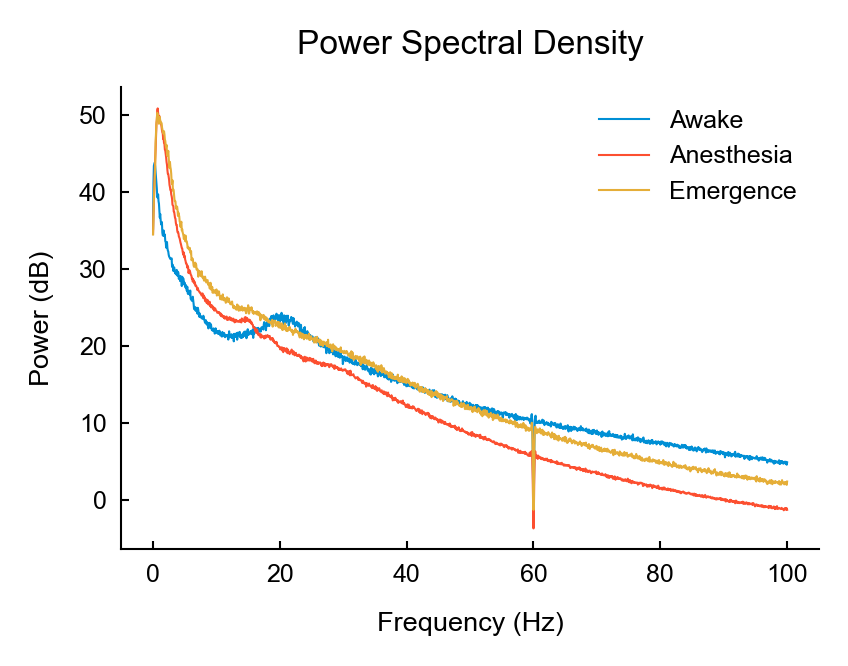

In [ ]:
freq_min = 0
freq_max = 100
freq_inds = (freqs >= freq_min) & (freqs <= freq_max)
plt.plot(freqs[freq_inds], 10*np.log10()[freq_inds], label='Awake')
plt.plot(freqs[freq_inds], 10*np.log10((np.abs(ffts[anesthesia_bool])**2).mean(axis=(0, 2)))[freq_inds], label='Anesthesia')
plt.plot(freqs[freq_inds], 10*np.log10((np.abs(ffts[emergence_bool])**2).mean(axis=(0, 2)))[freq_inds], label='Emergence')
plt.legend(['Awake', 'Anesthesia', 'Emergence'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.title('Power Spectral Density')
plt.show()

In [11]:
ffts.shape

(671, 7501, 231)